 # <font color='red'>Classifiers</font>
 
 - Naive Bayes
 
 - Logistic regression
 
 - K-nn
 
 - Randon Forest
 

Objetivo: Previsão da direção de PETR4 baseando se
    - Na direção do PETR4 do dia anterior
    - Na direção do Dax do dia anterior
    - Na direção do SP500 do dia anterior
    - Na direção do DJI do dia anterior
    - Na direção do Nikkey
    - Na direção do HSI

## Criação de um Dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%matplotlib inline 

In [4]:
start_date = '2001-01-01'
end_date = '2019-07-01'

In [5]:
petr4 = data.DataReader('PETR4.SA', 'yahoo', start_date, end_date)

In [6]:
base=pd.DataFrame(index=petr4.index)

In [7]:
base['PETR4.SA_forecast'] = ((petr4['Close'] - petr4['Open'])/petr4['Open']).shift(-1)

In [8]:
base['PETR4.SA_ret'] = (petr4['Close'] - petr4['Open'])/petr4['Open']

In [9]:
#Tickerlist_brazil = ['ITUB4.SA','BBDC4.SA','ABEV3.SA']

In [10]:
Tickerlist_america =['^DJI','^GSPC', '^IXIC']

In [11]:
Tickerlist_europa = ['^FCHI', '^GDAXI', '^BFX', '^AEX']

In [12]:
Tickerlist_oriente = ['^N225', '^HSI', '^AORD']

In [13]:
# shift(-1) próximo dia, sobe uma linha

In [14]:
## Laço para ações brasileiras
## Abertura de hoje - abertura de ontem
#for ticker in Tickerlist_brazil:
#    stock = data.DataReader(ticker, 'yahoo', start_date, end_date)
#    base[ticker] = stock['Open'] - stock['Open']

In [15]:
## Laço para ações europeias
## Abertura de hoje - abertura de ontem
for ticker in Tickerlist_europa:
    stock = data.DataReader(ticker, 'yahoo', start_date, end_date)
    base[ticker] = (stock['Close'] - stock['Open'])/stock['Open']

In [16]:
## Laço para ações do oriente
## Fechamento de hoje - abertura de hoje
for ticker in Tickerlist_oriente:
    stock = data.DataReader(ticker, 'yahoo', start_date, end_date)
    base[ticker] = ((stock['Close'] - stock['Open'])/stock['Open']).shift(-1)

In [17]:
## Laço para ações americanas
## Abertura de ontem - fechamento de ontem
for ticker in Tickerlist_america:
    stock = data.DataReader(ticker, 'yahoo', start_date, end_date)
    base[ticker] = stock['Open'] - stock['Close']

In [18]:
base.head()

,PETR4.SA_forecast,PETR4.SA_ret,^FCHI,^GDAXI,^BFX,^AEX,^N225,^HSI,^AORD,^DJI,^GSPC,^IXIC
Date,,,,,,,,,,,,
2001-01-02,0.055202,0.032751,-0.026401,-0.021974,0.005248,-0.003269,NaN,-0.010965,0.016916,144.769531,37.010010,182.299805
2001-01-03,0.003418,0.055202,-0.014495,0.023881,0.001793,-0.002392,NaN,0.011582,0.001979,-308.330078,-64.290039,-362.129883
2001-01-04,0.000000,0.003418,-0.012621,-0.010449,-0.012418,-0.012090,0.007585,0.006086,-0.010245,32.530273,14.220093,27.129883
2001-01-05,-0.012200,0.000000,-0.007098,-0.000160,0.003794,-0.003807,-0.008909,0.007073,NaN,250.799805,34.989990,165.460205
2001-01-08,0.008600,-0.012200,0.002974,0.003665,-0.003225,-0.002781,NaN,0.004035,-0.001536,37.380859,2.489990,-7.199951


### Verificação de NaN

In [19]:
# Verificando valores NaN
base.isnull().sum()

PETR4.SA_forecast      1
PETR4.SA_ret           0
^FCHI                 33
^GDAXI                46
^BFX                  35
^AEX                  35
^N225                254
^HSI                 196
^AORD                481
^DJI                 120
^GSPC                120
^IXIC                120
dtype: int64

In [20]:
base = base.fillna(method='ffill') ## Esse metodo completa of NaN com o ultimo valor valido da coluna.
base = base.dropna()

In [21]:
# Verificando valores NaN
base.isnull().sum()

PETR4.SA_forecast    0
PETR4.SA_ret         0
^FCHI                0
^GDAXI               0
^BFX                 0
^AEX                 0
^N225                0
^HSI                 0
^AORD                0
^DJI                 0
^GSPC                0
^IXIC                0
dtype: int64

In [22]:
print('Dimensão da Base: %s linhas e %s colunas' % (base.shape[0], base.shape[1]))

Dimensão da Base: 4531 linhas e 12 colunas


In [24]:
base['signal'] = [1 if base.loc[i, 'PETR4.SA_forecast']>0 else 0 for i in base.index]

In [25]:
n_p = len(base.columns)-1

### Analise exploratória

In [30]:
from pandas.plotting import scatter_matrix

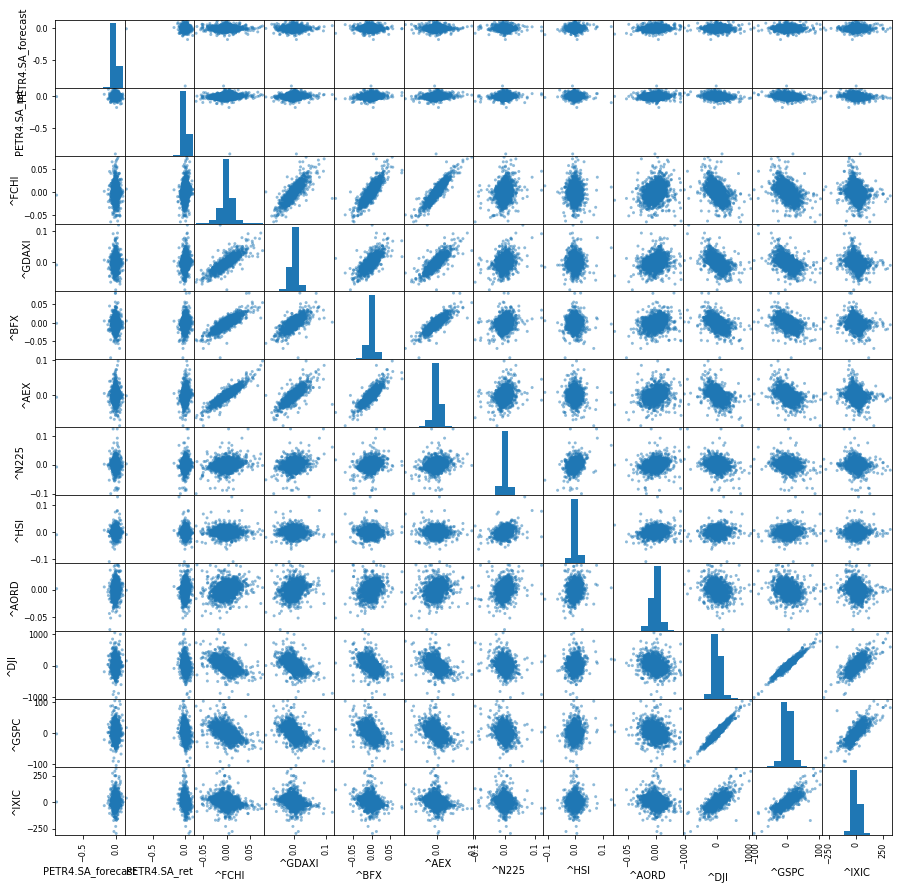

In [32]:
# Scatter plot
#from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(base.iloc[:,:-1], figsize=(15, 15))

In [34]:
# Correlação
corr_array =base.iloc[:, :-1].corr()['PETR4.SA_forecast']
print(corr_array)

PETR4.SA_forecast    1.000000
PETR4.SA_ret        -0.011595
^FCHI                0.016010
^GDAXI               0.021586
^BFX                 0.004863
^AEX                 0.010512
^N225               -0.004299
^HSI                 0.050385
^AORD                0.095449
^DJI                -0.005917
^GSPC               -0.003064
^IXIC                0.020869
Name: PETR4.SA_forecast, dtype: float64


### Divisão da base - Parte da base para modelagem e testes e outra parte para Backtest

In [35]:
base.shape[0]

4531

In [36]:
backtest = base.loc['2010-07-01':,:]

In [37]:
df_f = base.loc[:'2010-07-01',:]

### Dividindo a base de dados em treino e teste

In [38]:
size=df_f.shape[0]

In [39]:
selecao_train = np.random.choice(size, int(0.7*size), replace=False)

In [40]:
selecao_test = np.setdiff1d(np.arange(size), selecao_train)

In [41]:
df_train = df_f.iloc[selecao_train]
df_test = df_f.iloc[selecao_test]

### Normalização

In [42]:
minimos = df_train.min()
maximos = df_train.max()

In [43]:
# Função para a normalização dos dados 
def normalize(x, minimos, maximos):
    name = x.name
    return (x-minimos[name])/(maximos[name]-minimos[name])

Normalização da base de treino

In [44]:
df_train_n=df_train.apply(normalize, args=[minimos, maximos])

Normalização da base teste

In [45]:
df_test_n=df_test.apply(normalize, args=[minimos, maximos])

Obtendo dataframe apenas com os valores

In [46]:
df_train_n.head()

,PETR4.SA_forecast,PETR4.SA_ret,^FCHI,^GDAXI,^BFX,^AEX,^N225,^HSI,^AORD,^DJI,^GSPC,^IXIC,signal
Date,,,,,,,,,,,,,
2005-05-11,0.868568,0.888864,0.458628,0.365512,0.541721,0.400477,0.381351,0.303525,0.663296,0.547556,0.509730,0.449330,0.0
2004-08-17,0.901567,0.887304,0.497652,0.382732,0.564095,0.443005,0.421332,0.312175,0.599679,0.553936,0.524546,0.457383,1.0
2007-07-04,0.897473,0.892673,0.476238,0.380623,0.570424,0.423254,0.406830,0.298990,0.694733,0.535809,0.504674,0.440471,1.0
2006-07-19,0.859939,0.887513,0.628221,0.491791,0.622520,0.530239,0.475996,0.321657,0.713640,0.428561,0.402845,0.328405,0.0
2010-03-11,0.887281,0.894235,0.469966,0.382940,0.531521,0.406843,0.387092,0.293628,0.557054,0.532565,0.501558,0.411126,0.0


In [48]:
array_train = df_train_n.values
X_train = array_train[:,1:n_p]
Y_train = array_train[:,n_p]

array_test = df_test_n.values
X_test = array_test[:,1:n_p]
Y_test = array_test[:,n_p]

## Construindo e treinando os modelos

Usaremos 4 modelos de calssificação:
    - Naive Bayes
    - Randon Forest
    - Regressão logística
    - K-nn

In [49]:
from sklearn.naive_bayes import GaussianNB # Utilizando um classificador Naive Bayes
from sklearn.ensemble import RandomForestClassifier # Randon forest
from sklearn.linear_model import LogisticRegression # logistic
from sklearn.neighbors import KNeighborsClassifier #k-nn

#### Naive Bayes

In [50]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [51]:
# Treinando o modelo
modelo_v1.fit(X_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### Randon forest

In [52]:
modelo_v2 = RandomForestClassifier(random_state = 42, n_estimators=24, max_depth=4) ## number of trees = n_estimators default=10
modelo_v2.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
from sklearn import metrics

In [54]:
error_in=[]
error_out=[]
for i in range(50):
    modelo_randon = RandomForestClassifier(random_state = 42, n_estimators=i+1, max_depth=4)
    modelo_randon.fit(X_train, Y_train.ravel())
    randon_predict_test = modelo_randon.predict(X_test)
    randon_predict_train = modelo_randon.predict(X_train)
    error_out.append(1-metrics.accuracy_score(Y_test, randon_predict_test)) ### score da o valor de acerto, como queremos o erro, subtraimos de 1
    error_in.append(1-metrics.accuracy_score(Y_train, randon_predict_train))
    

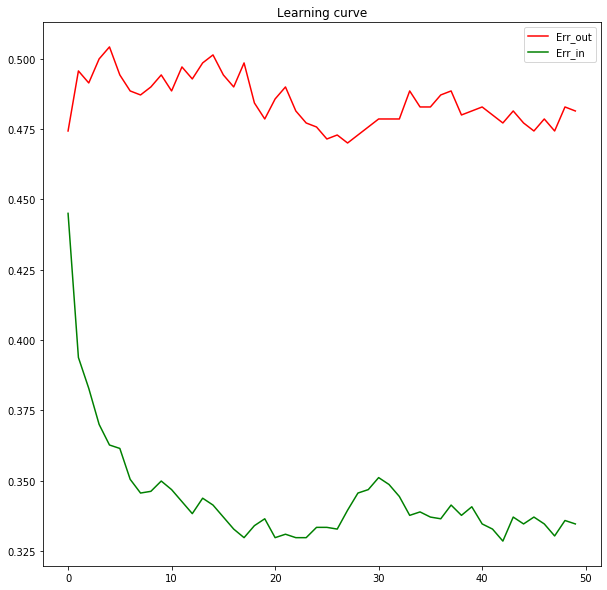

In [55]:
plt.figure(figsize=(10,10))
plt.plot(error_out, label='Err_out', color='r')
plt.plot(error_in, label='Err_in', color='g')
plt.legend()
plt.title('Learning curve')
plt.show()

#### Logistica

In [56]:
modelo_v3 = LogisticRegression(random_state = 42)
modelo_v3.fit(X_train, Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### K-nn

In [57]:
modelo_v4 = KNeighborsClassifier(n_neighbors=20)
modelo_v4.fit(X_train, Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [58]:
error_in=[]
error_out=[]
for i in range(100):
    modelo_knn = KNeighborsClassifier(n_neighbors=i+1)
    modelo_knn.fit(X_train, Y_train.ravel())
    knn_predict_test = modelo_knn.predict(X_test)
    knn_predict_train = modelo_knn.predict(X_train)
    error_out.append(1-metrics.accuracy_score(Y_test, knn_predict_test))
    
    error_in.append(1-metrics.accuracy_score(Y_train, knn_predict_train))
    

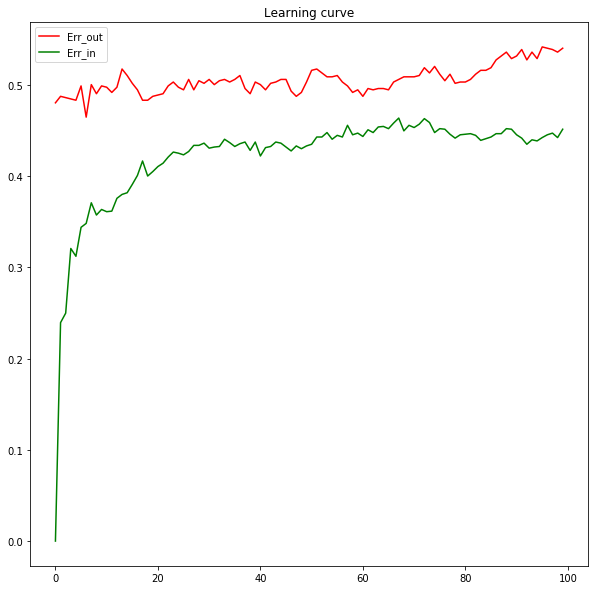

In [59]:
plt.figure(figsize=(10,10))
plt.plot(error_out, label='Err_out', color='r')
plt.plot(error_in, label='Err_in', color='g')
plt.legend()
plt.title('Learning curve')
plt.show()

### Verificando a exatidão no modelo na base de treino

In [60]:
from sklearn import metrics

In [61]:
nb_predict_train = modelo_v1.predict(X_train)
rf_predict_train = modelo_v2.predict(X_train)
lr_predict_train = modelo_v3.predict(X_train)
knn_predict_train = modelo_v4.predict(X_train)

In [62]:
nb_predict_test = modelo_v1.predict(X_test)
rf_predict_test = modelo_v2.predict(X_test)
lr_predict_test = modelo_v3.predict(X_test)
knn_predict_test = modelo_v4.predict(X_test)

### Generalização

In [63]:
error_treino =[]
error_teste = []
nb_treino = metrics.accuracy_score(Y_train, nb_predict_train)
rf_treino = metrics.accuracy_score(Y_train, rf_predict_train)
lr_treino = metrics.accuracy_score(Y_train, lr_predict_train)
knn_treino = metrics.accuracy_score(Y_train, knn_predict_train)
error_treino = [1-nb_treino,1-rf_treino,1-lr_treino,1-knn_treino]

nb_teste = metrics.accuracy_score(Y_test, nb_predict_test)
rf_teste = metrics.accuracy_score(Y_test, rf_predict_test)
lr_teste = metrics.accuracy_score(Y_test, lr_predict_test)
knn_teste = metrics.accuracy_score(Y_test, knn_predict_test)
error_teste = [1-nb_teste,1-rf_teste,1-lr_teste,1-knn_teste]

error=pd.DataFrame(index=['Naive', 'Randon forest', 'logistica', 'knn'])
error['treino'] = error_treino
error['teste'] = error_teste

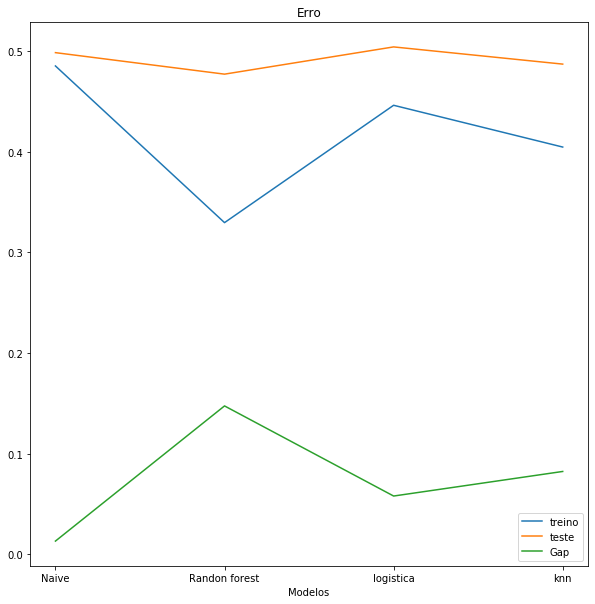

In [64]:
plt.figure(figsize=(10,10))
plt.plot(error['treino'], label='treino')
plt.plot(error['teste'], label='teste')
plt.plot(error['teste']-error['treino'], label='Gap')
plt.legend()
plt.xlabel('Modelos')
plt.title('Erro')
plt.show()

### Prints

In [65]:
print("Naive Bayes - Exatidão (Accuracy): {0:.4f}".format(nb_treino))
print("Randon forest - Exatidão (Accuracy): {0:.4f}".format(rf_treino))
print("Logistica - Exatidão (Accuracy): {0:.4f}".format(lr_treino))
print("k-nn - Exatidão (Accuracy): {0:.4f}".format(knn_treino))

Naive Bayes - Exatidão (Accuracy): 0.5147
Randon forest - Exatidão (Accuracy): 0.6703
Logistica - Exatidão (Accuracy): 0.5537
k-nn - Exatidão (Accuracy): 0.5952


### Verificando a exatidão dos modelos na base de teste


In [66]:
print("Naive Bayes - Exatidão (Accuracy): {0:.4f}".format(nb_teste))
print("Randon forest - Exatidão (Accuracy): {0:.4f}".format(rf_teste))
print("Logistica - Exatidão (Accuracy): {0:.4f}".format(lr_teste))
print("k-nn - Exatidão (Accuracy): {0:.4f}".format(knn_teste))

Naive Bayes - Exatidão (Accuracy): 0.5014
Randon forest - Exatidão (Accuracy): 0.5228
Logistica - Exatidão (Accuracy): 0.4957
k-nn - Exatidão (Accuracy): 0.5128
